 # Load Dataset


In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("Startup_Scoring_Dataset.csv")


In [7]:
df.head(5)

,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr
0,S001,7,789,66299,6091495,4183839,263247468
1,S002,4,939,34866,9106842,666326,172927107
2,S003,8,42,73630,8817088,649150,313090455
3,S004,5,57,93657,6374167,20153173,305887183
4,S005,7,512,61187,841971,118834,84815222


# Normalize the Data

In [10]:
positive_feature = ['team_experience','market_size_million_usd','monthly_active_users','funds_raised_inr','valuation_inr']
negative_feature = ['monthly_burn_rate_inr']
#Normalize
scaler = MinMaxScaler()
df_new = df.copy()
df_new[positive_feature] = scaler.fit_transform(df[positive_feature])
df_new[positive_feature] = scaler.fit_transform(df[positive_feature])
df_new[negative_feature] = 1- scaler.fit_transform(df[negative_feature])


In [12]:
df_new.head()

,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr
0,S001,0.666667,0.789206,0.669162,0.393230,0.082061,0.518992
1,S002,0.333333,0.941955,0.347274,0.084439,0.011052,0.333843
2,S003,0.777778,0.028513,0.744235,0.114112,0.010706,0.621166
3,S004,0.444444,0.043788,0.949320,0.364283,0.404435,0.606400
4,S005,0.666667,0.507128,0.616813,0.930815,0.000000,0.153220


# Feature weight assign


In [15]:
weights = {'team_experience':0.15,
           'market_size_million_usd':0.20,
           'monthly_active_users':0.25,
           'monthly_burn_rate_inr':0.10,
           'funds_raised_inr':0.10,
           'valuation_inr':0.20  
}


# Calculate Score

In [18]:
df_new['composite_score'] = sum(df_new[feature] * weight for feature, weight in weights.items())
df_new['composite_score']= df_new['composite_score'] * 100

# Rank Startups

In [49]:
df_new['startup_id'] = df['startup_id']
#rank by score
df_ranked = df_new.sort_values(by='composite_score',ascending=False)
top_10 = df_ranked.head(10)
bottom_10 = df_ranked.tail(10)
print("Top 10 Startup")
print(top_10[['startup_id','composite_score']])
print("Bottom 10 Startup")
print(bottom_10[['startup_id','composite_score']])

Top 10 Startup
   startup_id  composite_score
5        S006        79.157433
44       S045        76.437558
76       S077        76.391682
32       S033        73.918777
28       S029        73.364384
96       S097        73.091131
12       S013        72.604364
11       S012        69.856259
7        S008        68.773096
42       S043        68.474004
Bottom 10 Startup
   startup_id  composite_score
50       S051        33.119537
16       S017        32.799997
92       S093        32.231949
78       S079        31.667025
73       S074        30.770841
57       S058        30.250202
97       S098        26.344424
83       S084        25.842748
22       S023        24.231122
54       S055        19.174274


# Visualization

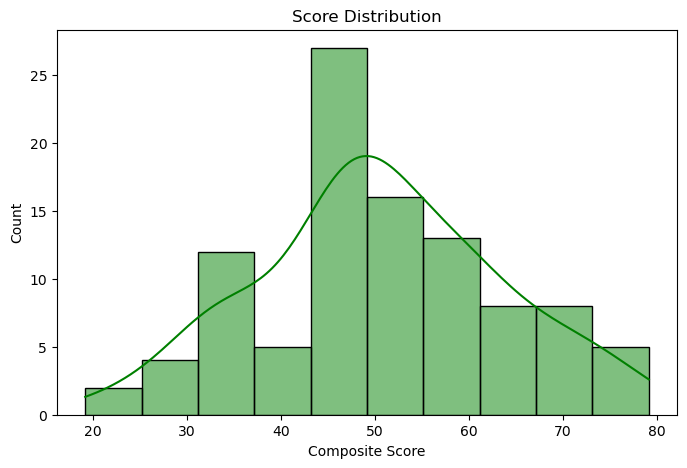

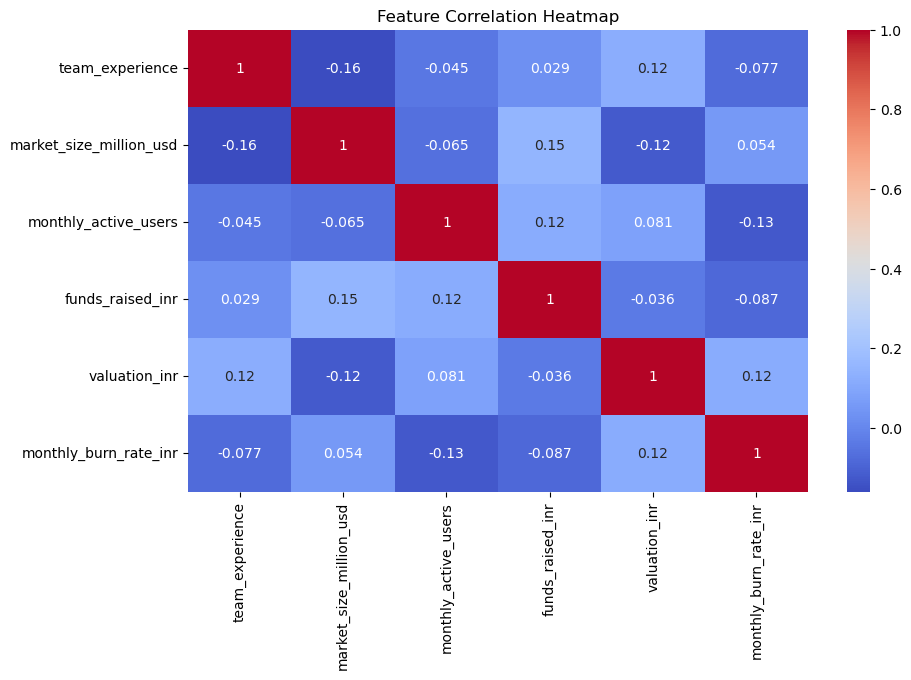

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11732\3719412963.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_ranked, x='startup_id', y='composite_score', palette='viridis')


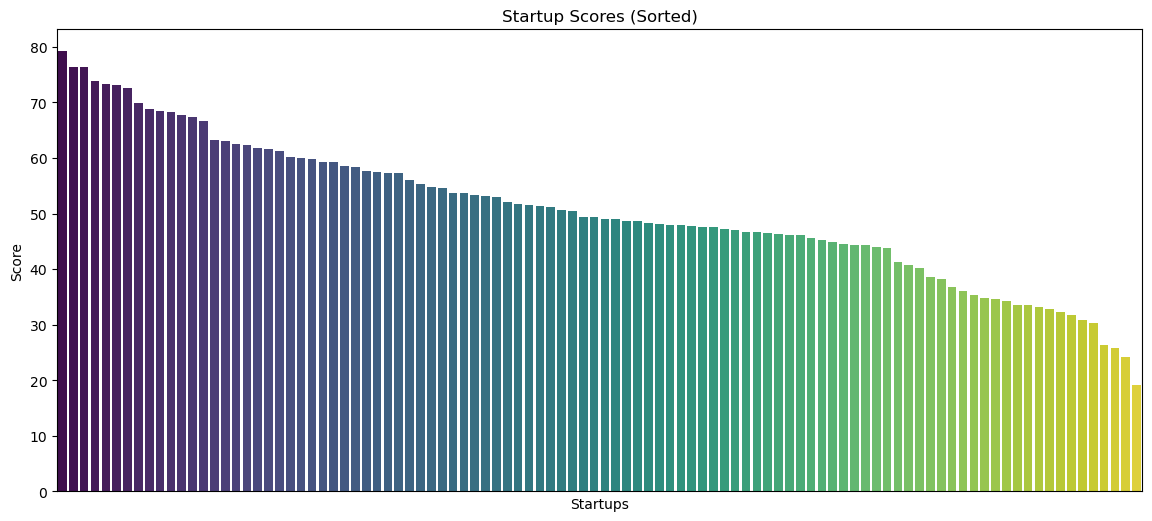

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_ranked['composite_score'], kde=True, color='green')
plt.title("Score Distribution")
plt.xlabel("Composite Score")
#plt.savefig("outputs/score_distribution.png")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[positive_feature + negative_feature].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
# plt.savefig("outputs/correlation_heatmap.png")
plt.show()

# Ranked Bar Chart
plt.figure(figsize=(14, 6))
sns.barplot(data=df_ranked, x='startup_id', y='composite_score', palette='viridis')
plt.xticks([], [])
plt.title("Startup Scores (Sorted)")
plt.xlabel("Startups")
plt.ylabel("Score")
# plt.savefig("outputs/ranked_scores.png")
plt.show()

# Optional ML Enhancement

In [99]:
from sklearn.ensemble import RandomForestRegressor

# Use original (normalized) features
X = df_new[['team_experience', 'market_size_million_usd', 'monthly_active_users',
             'monthly_burn_rate_inr', 'funds_raised_inr']]
y = df['valuation_inr']

model = RandomForestRegressor(random_state=0)
model.fit(X, y)

importances = model.feature_importances_
for col, score in zip(X.columns, importances):
    print(f"{col}: {score:.3f}")

team_experience: 0.106
market_size_million_usd: 0.309
monthly_active_users: 0.240
monthly_burn_rate_inr: 0.172
funds_raised_inr: 0.174


In [101]:
from sklearn.ensemble import RandomForestRegressor

# Select features and target
X = df_new[['team_experience', 'market_size_million_usd', 'monthly_active_users',
             'monthly_burn_rate_inr', 'funds_raised_inr']]
y = df['valuation_inr'] 

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'ML_Derived_Weight': importances / importances.sum()
}).sort_values(by='ML_Derived_Weight', ascending=False)

feature_importance

,Feature,ML_Derived_Weight
1,market_size_million_usd,0.308824
2,monthly_active_users,0.239724
4,funds_raised_inr,0.173534
3,monthly_burn_rate_inr,0.171938
0,team_experience,0.105980


In [103]:
manual_weights = {
    'team_experience': 0.106,
    'market_size_million_usd': 0.309,
    'monthly_active_users': 0.240,
    'monthly_burn_rate_inr': 0.172,
    'funds_raised_inr': 0.174
}

feature_importance['Manual_Weight'] = feature_importance['Feature'].map(manual_weights)
feature_importance

,Feature,ML_Derived_Weight,Manual_Weight
1,market_size_million_usd,0.308824,0.309
2,monthly_active_users,0.239724,0.240
4,funds_raised_inr,0.173534,0.174
3,monthly_burn_rate_inr,0.171938,0.172
0,team_experience,0.105980,0.106


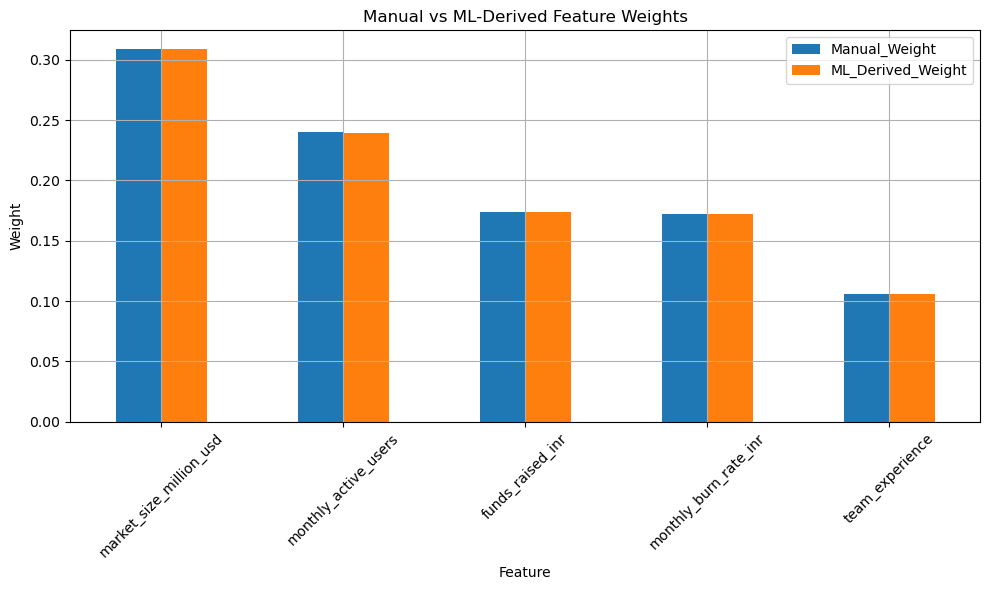

In [105]:
import matplotlib.pyplot as plt

feature_importance.set_index('Feature')[['Manual_Weight', 'ML_Derived_Weight']].plot(kind='bar', figsize=(10,6))
plt.title("Manual vs ML-Derived Feature Weights")
plt.ylabel("Weight")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()